# Chicago Crime Data 2001 to Present
Chicago Data Portal: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2

**Description of Data:** 

- ID: Unique identifier of the record
- Case Number: Chicago PD Records Division Number
- Date: Date and time of incident
- Block: Partially redacted address
- ICUR: Illinois Uniform Crime Reporting Code
- Primary Type: Primary description of the IUCR code
- Description: Secondary description of the IUCR code
- Location Description: classification of location
- Arrest: True/False, Indicates whether an arrest was made
- Domestic: Indicates if incident was domestic related as defined by the Illinois Domestic Abuse Act.
- Beat: Location of incident, a beat is the smallest police geographical area.
- District: Police district area whee the incident occurred.
- Ward: City Council district where the incident occurred.  
- Community Area:  Chicago has 77 defined community areas.
- FBI Code: classification of incident as defined by the FBI National Incident Based Reporting System.
- X Coordinate: State plane projection coordinates 
- Y Coordinate: State plane projection coordinates
- Year: Year incident occurred
- Updated On: Date of last update
- Latitude: Coordinates, shifted for partial redaction
- Longitude: Coordinates, shifted for partial redaction
- Location: Latitude and Longitude Coordinates

In [1]:
# Loading Imports
import os,glob
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as miss
import datetime as dt
import statsmodels.tsa.api as tsa

import warnings

In [2]:
warnings.filterwarnings('ignore')

# Load Chicago Crime Data 2001- Present

In [3]:
# Define the directory path
directory_path = "Data/Chicago"

# Specify the file pattern
file_pattern = f"{directory_path}/*.csv"

# Get a list of CSV files in the specified directory
csv_files = glob.glob(file_pattern)

# Create an empty list to store DataFrames from each CSV file
dfs = []

# Iterate through the list of CSV files, read each CSV file into a DataFrame, and append it to the dfs list
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dfs.append(df)

# Concatenate all the DataFrames in the dfs list into a single DataFrame
final_df = pd.concat(dfs, ignore_index=True)

In [4]:
# Checking that final_df loaded correctly
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7897703 entries, 0 to 7897702
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 617.6+ MB


In [5]:
# Making a copy of final_df
df = final_df.copy()

In [6]:
# Checking date column instance
df.loc[0, 'Date' ]

'01/01/2001 01:00:00 PM'

In [7]:
# Set date format
fmt ='%m/%d/%Y %I:%M:%S %p'

In [8]:
# Convert Date column to datetime
df['datetime'] = pd.to_datetime(df['Date'], format=fmt)

In [9]:
# Checking for null values 
df.isna().sum()

ID                           0
Date                         0
Primary Type                 0
Description                  0
Location Description     11803
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614849
Latitude                 89821
Longitude                89821
datetime                     0
dtype: int64

In [10]:
# Set Datetime to index
df_ts = df.set_index('datetime')
df_ts

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
datetime,,,,,,,,,,,,
2001-01-01 13:00:00,1358218,01/01/2001 01:00:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,312,3.0,NaN,41.778744,-87.612135
2001-01-01 01:00:00,1311933,01/01/2001 01:00:00 AM,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1434,14.0,NaN,41.910797,-87.682214
2001-01-01 01:00:00,1310610,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,41.944854,-87.684418
2001-01-01 01:00:00,1328315,01/01/2001 01:00:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,NaN,41.771269,-87.662929
2001-01-01 01:00:00,1311123,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,41.854014,-87.681909
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-18 00:00:00,13214935,09/18/2023 12:00:00 AM,THEFT,OVER $500,APARTMENT,False,False,1934,19.0,44.0,41.934326,-87.640408
2023-09-18 00:00:00,13214587,09/18/2023 12:00:00 AM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1533,15.0,28.0,41.880486,-87.746119
2023-09-18 00:00:00,13216919,09/18/2023 12:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,1924,19.0,44.0,41.944512,-87.650520


## Crimes Trends Across Years:
- Is the total number of crimes increasing or decreasing across the years?
     - Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [11]:
df_ts['Primary Type'].value_counts()

Primary Type
THEFT                                1666744
BATTERY                              1442465
CRIMINAL DAMAGE                       900382
NARCOTICS                             749726
ASSAULT                               517183
OTHER OFFENSE                         490131
BURGLARY                              427443
MOTOR VEHICLE THEFT                   387612
DECEPTIVE PRACTICE                    352524
ROBBERY                               296954
CRIMINAL TRESPASS                     216195
WEAPONS VIOLATION                     110324
PROSTITUTION                           69927
OFFENSE INVOLVING CHILDREN             56574
PUBLIC PEACE VIOLATION                 52709
SEX OFFENSE                            31395
CRIM SEXUAL ASSAULT                    27580
INTERFERENCE WITH PUBLIC OFFICER       18622
LIQUOR LAW VIOLATION                   14980
GAMBLING                               14624
ARSON                                  13476
HOMICIDE                               128

In [12]:
# Combining values for Criminal Sexual Assault
df_ts['Primary Type'].replace('CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT', inplace=True)

In [13]:
# Getting a list of unique values
primary_crimes = df_ts['Primary Type'].unique()
primary_crimes

array(['ASSAULT', 'SEX OFFENSE', 'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE',
       'THEFT', 'OFFENSE INVOLVING CHILDREN', 'BATTERY',
       'MOTOR VEHICLE THEFT', 'GAMBLING', 'OTHER OFFENSE',
       'CRIMINAL SEXUAL ASSAULT', 'PUBLIC PEACE VIOLATION',
       'WEAPONS VIOLATION', 'BURGLARY', 'NARCOTICS',
       'LIQUOR LAW VIOLATION', 'ROBBERY', 'CRIMINAL TRESPASS',
       'INTERFERENCE WITH PUBLIC OFFICER', 'HOMICIDE', 'KIDNAPPING',
       'PROSTITUTION', 'STALKING', 'INTIMIDATION', 'ARSON', 'RITUALISM',
       'DOMESTIC VIOLENCE', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION',
       'PUBLIC INDECENCY', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON-CRIMINAL', 'HUMAN TRAFFICKING',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'], dtype=object)

In [14]:
# Create a blank dictionary for Primary_crimes
crimes = {}

# Create a loop to store primary crime values and their yearly frequencies
for crime in primary_crimes:
    copy_crimes = df_ts.loc[df_ts['Primary Type'] == crime].copy()
    crime_yearly_frequency = copy_crimes.resample('A').size()
    
    # Store the yearly frequency in the dictionary with the primary crime as the key
    crimes[crime] = crime_yearly_frequency

# Print the yearly frequencies for each primary crime
for crime, yearly_frequency in crimes.items():
    print(f"Primary Crime: {crime}")
    print(yearly_frequency)

Primary Crime: ASSAULT
datetime
2001-12-31    31384
2002-12-31    31523
2003-12-31    29477
2004-12-31    28850
2005-12-31    27067
2006-12-31    25945
2007-12-31    26313
2008-12-31    25448
2009-12-31    22861
2010-12-31    21537
2011-12-31    20411
2012-12-31    19900
2013-12-31    17972
2014-12-31    16903
2015-12-31    17048
2016-12-31    18742
2017-12-31    19306
2018-12-31    20406
2019-12-31    20620
2020-12-31    18252
2021-12-31    20342
2022-12-31    20800
2023-12-31    16076
Freq: A-DEC, dtype: int64
Primary Crime: SEX OFFENSE
datetime
2001-12-31    2239
2002-12-31    2173
2003-12-31    2078
2004-12-31    1805
2005-12-31    1817
2006-12-31    1576
2007-12-31    1529
2008-12-31    1502
2009-12-31    1265
2010-12-31    1137
2011-12-31    1096
2012-12-31    1086
2013-12-31    1059
2014-12-31    1013
2015-12-31    1045
2016-12-31    1051
2017-12-31    1061
2018-12-31    1261
2019-12-31    1370
2020-12-31     963
2021-12-31    1095
2022-12-31    1222
2023-12-31     952
Freq: A-D

In [15]:
# Calculate the total frequency of each primary crime type over the years
crime_totals = df_ts.groupby('Primary Type').resample('Y').size().unstack().fillna(0)

# Calculate the total frequency for each crime type
crime_totals['Total'] = crime_totals.sum(axis=1)

# Sort the crime types by total frequency in descending order
sorted_crimes = crime_totals.sort_values(by='Total', ascending=False)

# Get the top 12 crime types
top_12_crimes = sorted_crimes.head(12)

# Get the remaining crime types
other_crimes = sorted_crimes.iloc[12:]

In [16]:
# Drop total columns for top 12
top_12_crimes = top_12_crimes.drop(columns='Total')

In [17]:
# Drop total columns for other crimes
other_crimes = other_crimes.drop(columns='Total')

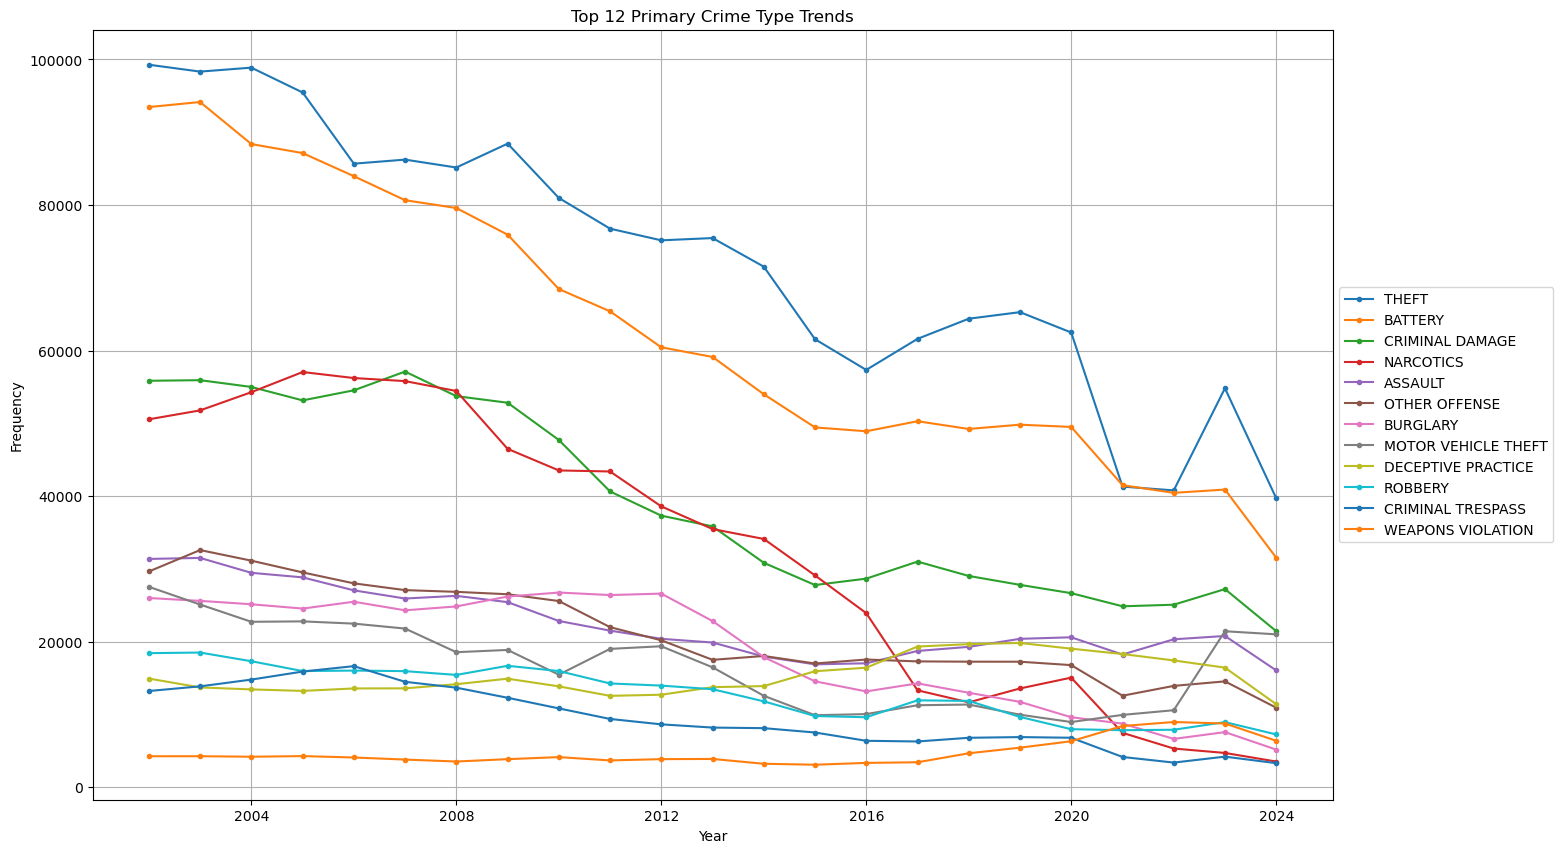

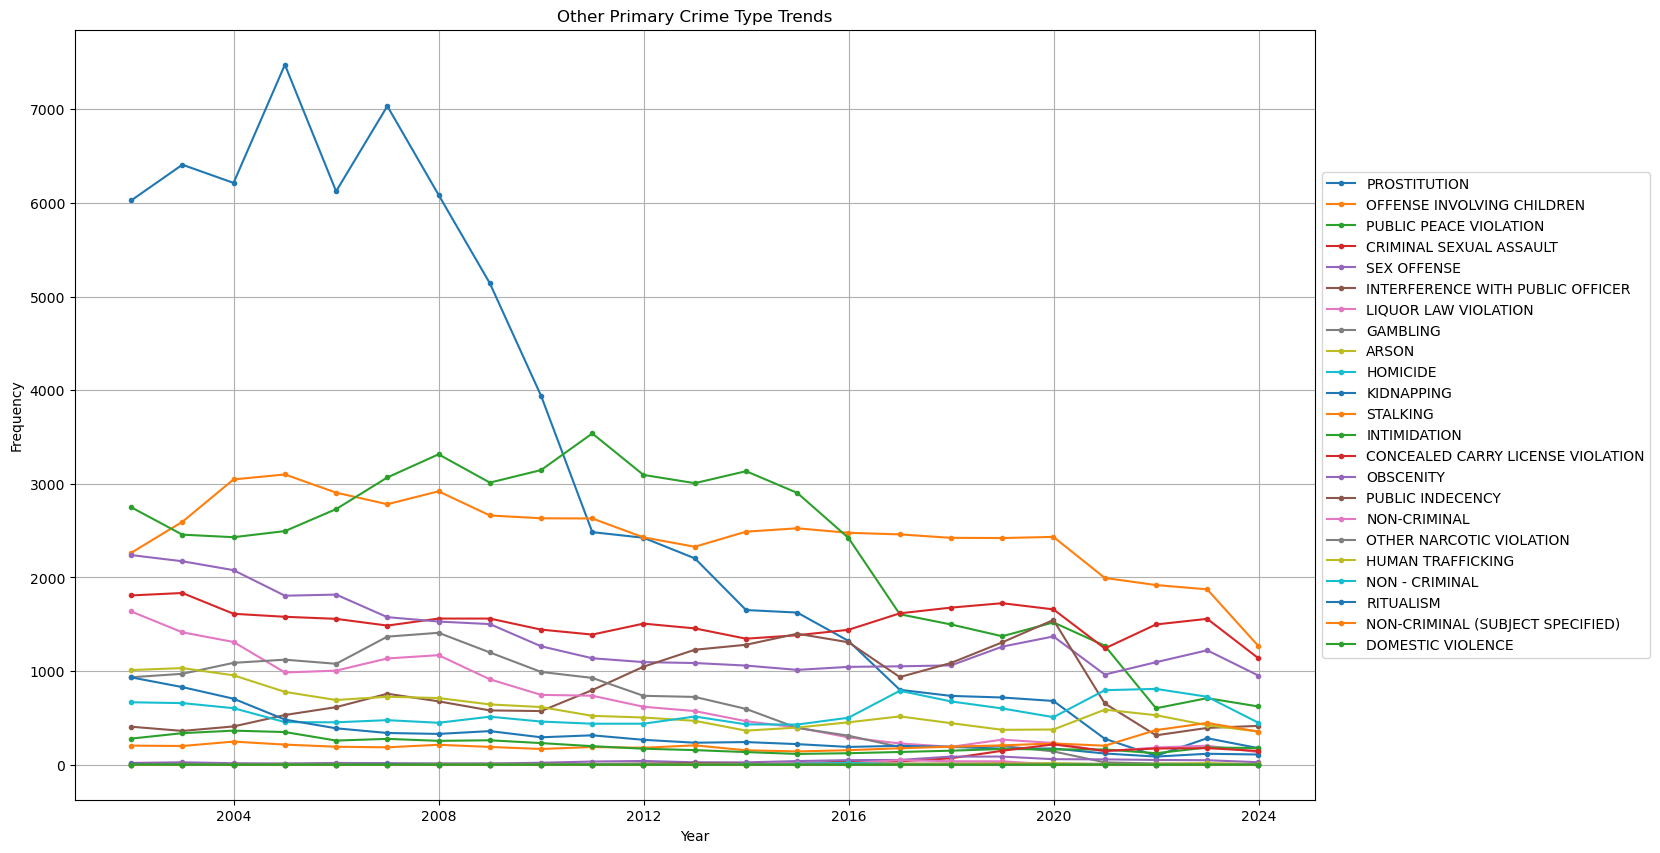

In [18]:
# Create separate plots for the top 12 crimes
plt.figure(figsize=(16, 10))
for crime in top_12_crimes.index:
        plt.plot(top_12_crimes.columns, top_12_crimes.loc[crime], marker = '.',  linestyle='-', label=crime)

plt.title('Top 12 Primary Crime Type Trends')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Create a separate plot for the remaining crime types
plt.figure(figsize=(16, 10))
for crime in other_crimes.index:
        plt.plot(other_crimes.columns, other_crimes.loc[crime], marker='.', linestyle='-', label=crime)

plt.title('Other Primary Crime Type Trends')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


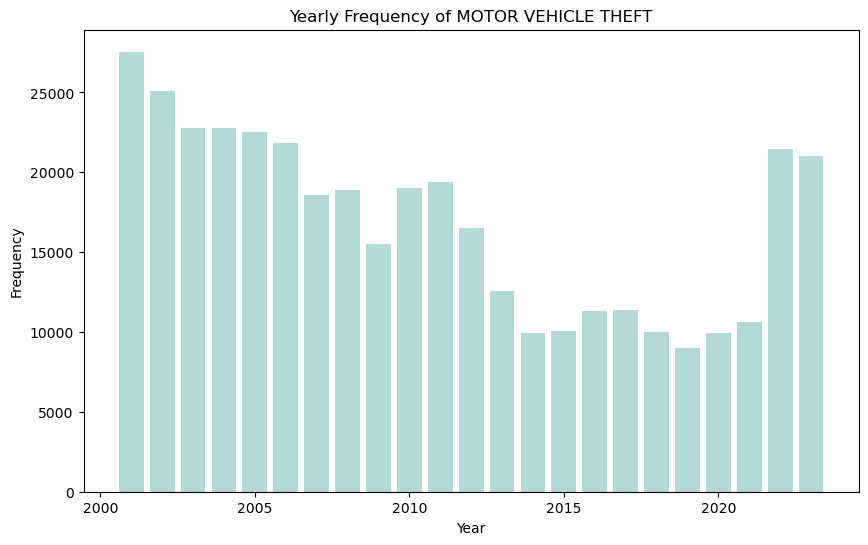

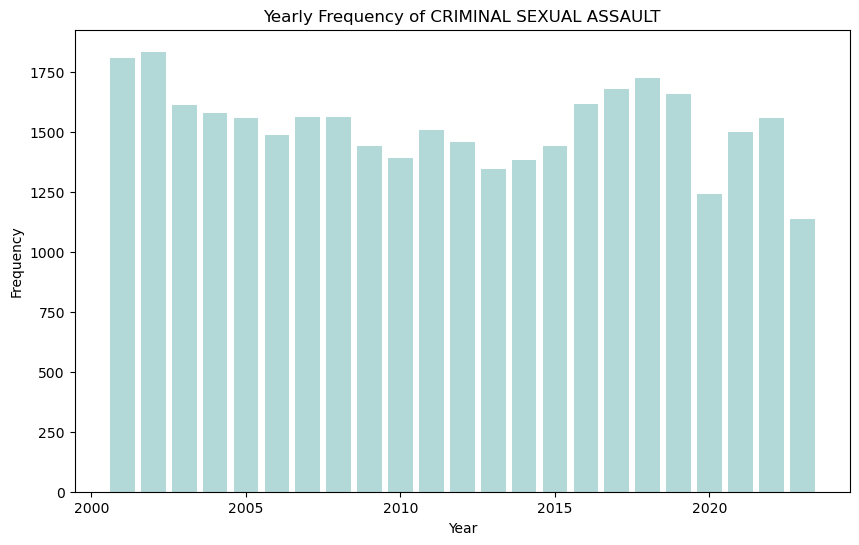

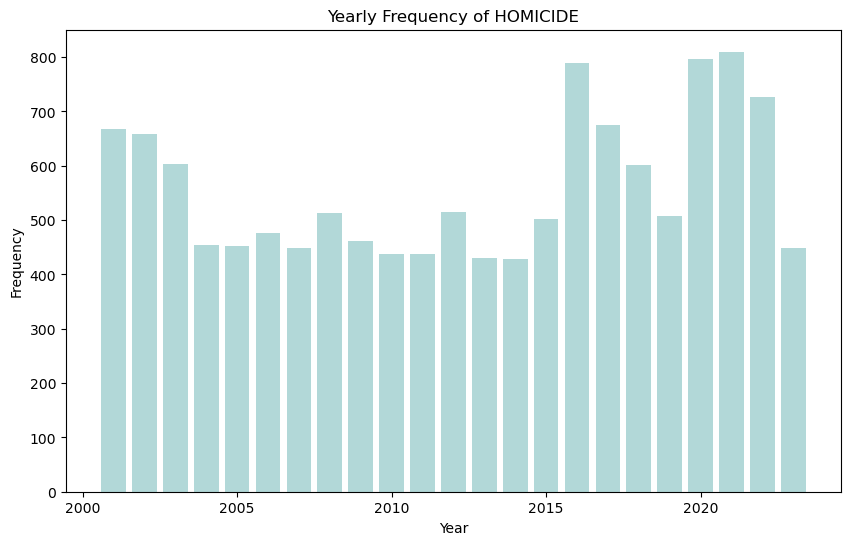

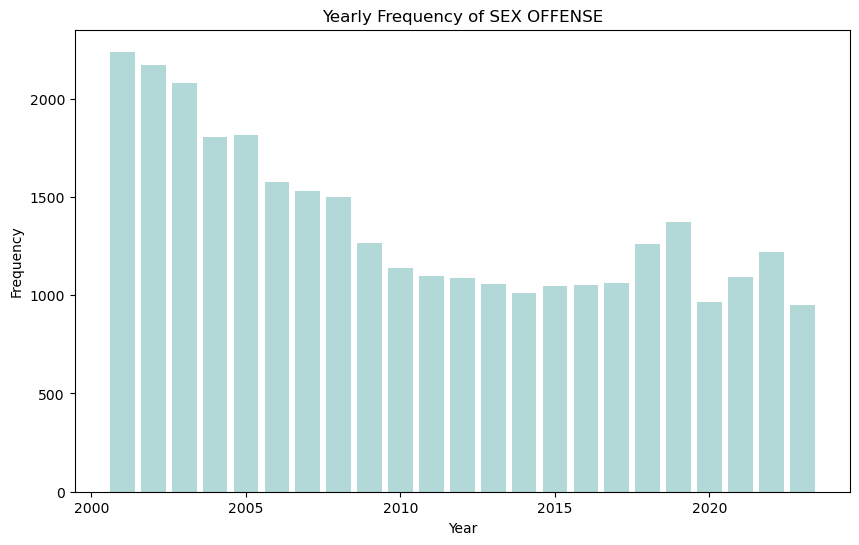

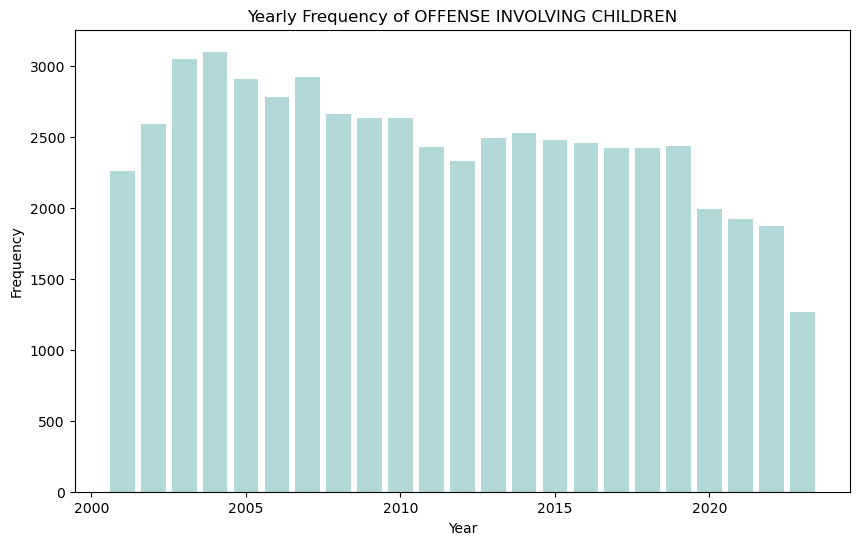

In [25]:
# Define the crimes you want to create bar graphs for
selected_crimes = ['MOTOR VEHICLE THEFT', 'CRIMINAL SEXUAL ASSAULT', 'HOMICIDE', 'SEX OFFENSE', 'OFFENSE INVOLVING CHILDREN']

# Create separate bar graphs for each selected crime
for crime in selected_crimes:
    # Get the yearly frequencies for the selected crime
    yearly_frequency = crimes[crime]
    
    # Create a bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(yearly_frequency.index.year, yearly_frequency.values, width=0.8, color = "teal", alpha= 0.3)
    
    # Customize the plot
    plt.title(f'Yearly Frequency of {crime}')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    
    # Show the plot
    plt.show()

**From the figures above, we can see that the overall trends of reported crime have decreased since 2021.  The top 12 crimes have shown the same overall decrease with the top four crimes (theft, battery, criminal damage, and narcotics) decreasing significantly over the years, while other crimes seen to have remained a bit more stable.  Crimes such as motor vehicle theft and homicide have a less defined trend and have seen an uptick in incidence since 2015.**


**Some crimes have seen an opposite trend and have increased over the years such as Weapons violations, and interference with public officer.**

**A normalized view of this data may be helpful in deciphering these changes to see if decreasing crime is being caused by less crime or if there may be less reporting of crime or officers responding to incidents.**

## Comparing AM vs. PM Rush Hour:
- Are crimes more common during AM rush hour or PM rush hour?
    - You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour
    - You can consider any crime that occurred between 4 -7 PM as PM rush hour.
- What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
- Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

In [20]:
# Adding column for hour of day
df_ts["Hour of Day"] = df_ts.index.hour

df_ts

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Hour of Day
datetime,,,,,,,,,,,,,
2001-01-01 13:00:00,1358218,01/01/2001 01:00:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,312,3.0,NaN,41.778744,-87.612135,13
2001-01-01 01:00:00,1311933,01/01/2001 01:00:00 AM,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1434,14.0,NaN,41.910797,-87.682214,1
2001-01-01 01:00:00,1310610,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,41.944854,-87.684418,1
2001-01-01 01:00:00,1328315,01/01/2001 01:00:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,NaN,41.771269,-87.662929,1
2001-01-01 01:00:00,1311123,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,41.854014,-87.681909,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-18 00:00:00,13214935,09/18/2023 12:00:00 AM,THEFT,OVER $500,APARTMENT,False,False,1934,19.0,44.0,41.934326,-87.640408,0
2023-09-18 00:00:00,13214587,09/18/2023 12:00:00 AM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1533,15.0,28.0,41.880486,-87.746119,0
2023-09-18 00:00:00,13216919,09/18/2023 12:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,1924,19.0,44.0,41.944512,-87.650520,0


In [21]:
# Group by crime type by hour 
crimes_by_hour = df_ts.groupby('Primary Type')['Hour of Day'].value_counts().sort_index()
crimes_by_hour

Primary Type       Hour of Day
ARSON              0              1096
                   1              1096
                   2              1085
                   3              1002
                   4               901
                                  ... 
WEAPONS VIOLATION  19             7975
                   20             8716
                   21             9260
                   22             9099
                   23             8419
Name: count, Length: 776, dtype: int64

In [22]:
# Convert to Dataframe
hourly = crimes_by_hour.to_frame("Instances").reset_index()
hourly

,Primary Type,Hour of Day,Instances
0,ARSON,0,1096
1,ARSON,1,1096
2,ARSON,2,1085
3,ARSON,3,1002
4,ARSON,4,901
...,...,...,...
771,WEAPONS VIOLATION,19,7975
772,WEAPONS VIOLATION,20,8716
773,WEAPONS VIOLATION,21,9260
774,WEAPONS VIOLATION,22,9099


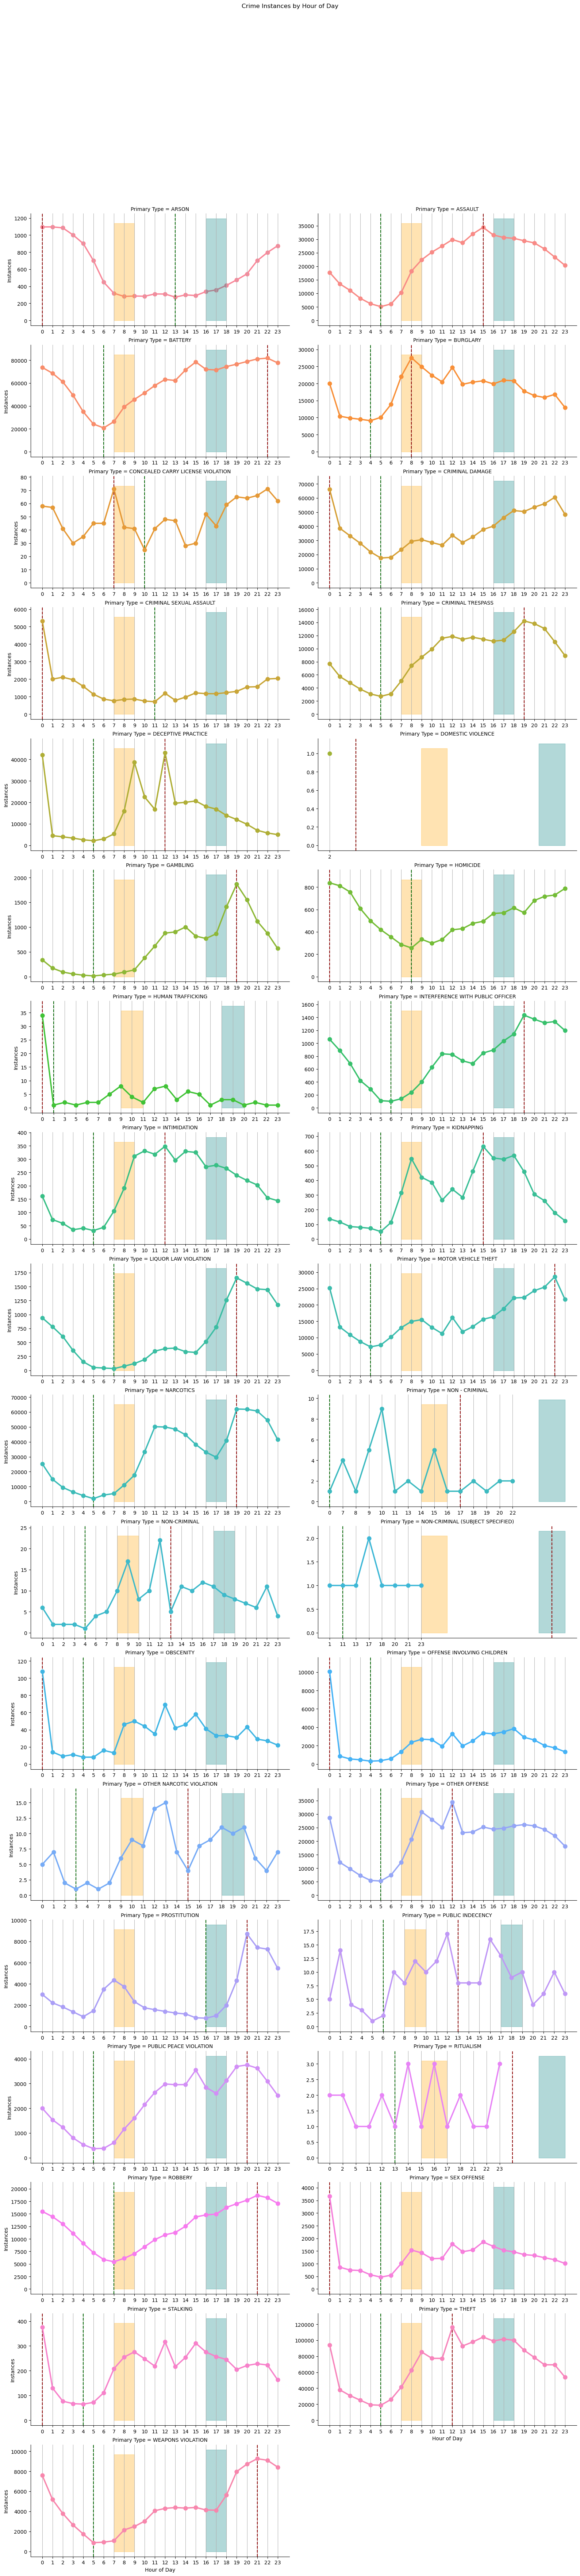

In [24]:
fig = sns.catplot(
    data=hourly,
    x='Hour of Day',
    y='Instances',
    hue="Primary Type",
    col='Primary Type',
    col_wrap=2,
    aspect=2,
    height=4,
    kind='point',
    sharey=False,
    sharex=False
)

for col, ax in fig.axes_dict.items():
    min_, max_ = crimes_by_hour[col].agg(['idxmin', 'idxmax'])  # Corrected 'idmin' to 'idxmin'
    
    # Add vertical lines for min and max hours
    ax.axvline(min_, color='darkgreen', ls='--')
    ax.axvline(max_, color='darkred', ls='--')
    
    # Fill between 7-10 AM with orange
    ax.fill_between(range(7, 10), 0, ax.get_ylim()[1], color='orange', alpha=0.3)
    
    # Fill between 4-7 PM with teal
    ax.fill_between(range(16, 19), 0, ax.get_ylim()[1], color='teal', alpha=0.3)
    
    # Add x grid
    ax.grid(axis='x')
    
fig.fig.subplots_adjust(top=0.9)
fig.fig.suptitle('Crime Instances by Hour of Day')
plt.show(); 

**1. Burglary:** Burglary incidents tend to peak around 8 AM. This peak could be attributed to people leaving for work and realizing that their cars or businesses were broken into during the night.

**2. Gambling and Liquor Law Violations:** Incidents related to gambling and liquor law violations steadily increase over the course of the workday and peak shortly after the evening rush hour. This suggests that these violations may be more common during late work hours and early evening social activities.

**3. Homicide:** Homicide incidents are at their lowest during the morning rush hour (AM). This could be due to the heightened police presence or a decrease in violent crimes during this time.

**4. Kidnapping:** Kidnapping incidents occur most frequently during both the morning (AM) and evening (PM) rush hours. This suggests that kidnappings may happen when people are commuting to and from work or other activities, potentially due to increased opportunities for criminals during busy times.

**5. Motor Vehicle Theft:** Motor vehicle theft has a small peak during the morning rush hour (AM) and continues to rise steadily as the day progresses. The peak hours for motor vehicle theft are at 11 PM, indicating that late evening and nighttime are more susceptible to these crimes.

**These insights help us understand the patterns and trends in different types of crimes throughout the day, which can be valuable for law enforcement and policymakers in allocating resources and implementing crime prevention strategies.**

## Comparing Police Districts:
- Which district has the most crimes? Which has the least?

In [48]:
# Group the data by district and count the number of crimes in each district
district_crime_counts = df.groupby('District')['Primary Type'].count()

# Optionally, you can sort the districts by the number of crimes
district_crime_counts = district_crime_counts.sort_values(ascending=False)

# Print or visualize the results
print(district_crime_counts)

District
8.0     530375
11.0    506022
6.0     461856
7.0     455118
25.0    448916
4.0     448308
3.0     400456
12.0    392359
9.0     385439
2.0     374509
19.0    355505
18.0    354951
5.0     349531
10.0    340270
15.0    337324
1.0     320922
14.0    305226
16.0    264663
22.0    258609
24.0    239109
17.0    227933
20.0    140004
31.0       247
21.0         4
Name: Primary Type, dtype: int64


In [54]:
# Convert to Dataframe
district_crime_counts = crimes_by_district.to_frame('Incidents').reset_index()
district_crime_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   District      733 non-null    float64
 1   Primary Type  733 non-null    object 
 2   Incidents     733 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 17.3+ KB


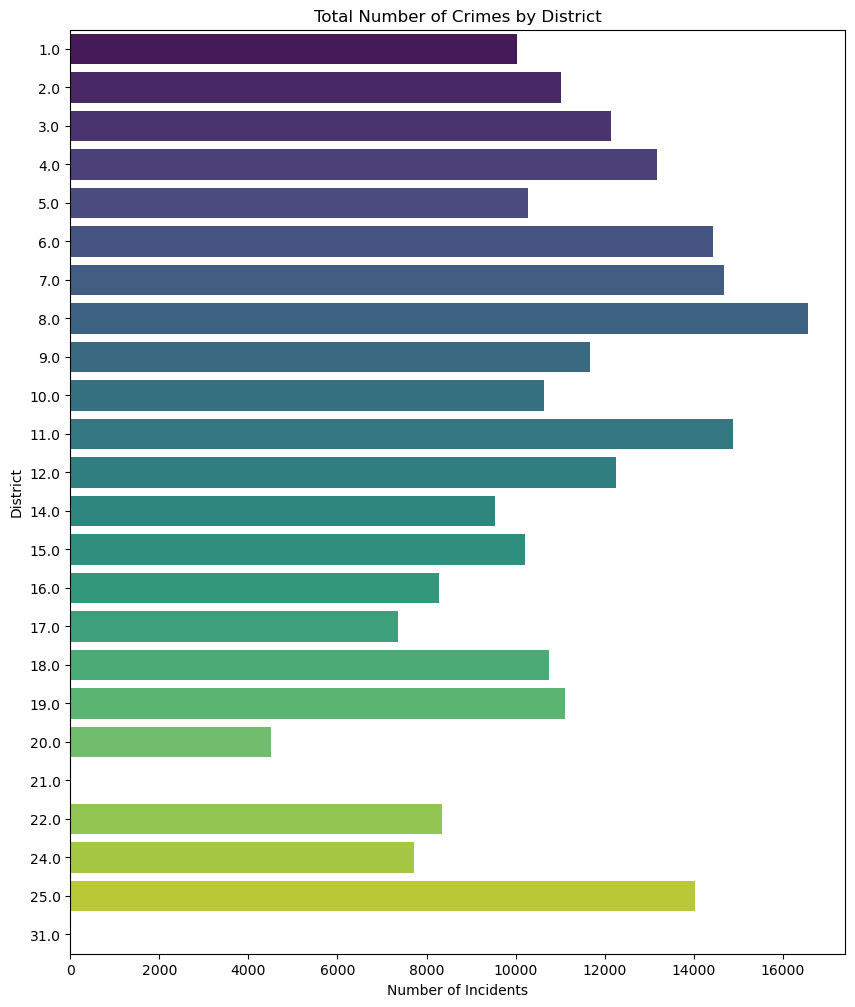

In [53]:
# Creating a figure to display number of incidents for each district
custom_palette = 'viridis'

# Create the horizontal bar plot
plt.figure(figsize=(10, 12))  # Adjust the figure size as needed
sns.barplot(data=district_crime_counts, x='Incidents', y='District', palette=custom_palette, orient='horizontal', ci=None)
plt.xlabel('Number of Incidents')
plt.ylabel('District')
plt.title('Total Number of Crimes by District')
plt.show(); 

**District 8 stands out with the highest number of reported crime incidents, followed closely by districts 11, 7, 6, and 25, all of which exhibit substantially high levels of reported incidents. In contrast, districts 31 and 21 have remarkably low levels of reported crime, with only 4 and 247 incidents respectively. Additionally, districts 20 and 24 are among the districts with the fewest reported crime incidents.**